# Detección de pre-miRNAs a partir de aprendizaje automatico #
**Objetivo**: comparar modelos capaces de identificar potenciales secuencias pre-miRNAs en el genoma de *Drosophila melanogaster* a partir de sus caracteristicas, y diferenciarla de secuencias que no son pre-miRNAs. 

**Motivación**: La identificación de pre-miRNAs es fundamental para entender la regulación génica en organismos eucariotas y ha sido objeto de estudio en la biología molecular durante los últimos años. Sin embargo, la detección de estas secuencias puede ser difícil dada su corta longitud y que no codifican proteínas. Debido a esto, no es sencillo identificar pre-miRNAs usando métodos basados en alineamientos como BLAST. En este trabajo me propongo utilizar la ciencia de datos y el aprendizaje supervisado para generar modelos capaces de predecir si una secuencia, dadas sus caracteristicas, genera un pre-miRNA.
Las caracteristicas requeridas para realizar la clasificación - como energía libre liberada, la cantidad de nucleótidos formando ciertos patrones, etc - pueden ser extraidas a partir de las secuencias de las horquillas. La disponibilidad de un genoma de *Drosophila melanogaster* completamente secuenciado facilita esta tarea.

## Software utilizado ##

En este proyecto se utilizó Python como lenguaje de programación, dada a su popularidad en el ámbito científico y a que cuenta con numerosas *libraries* para procesamiento de datos y machine learning. Las librerías utilizadas en este proyecto son las siguientes:

- *Matplotlib.pyplot* y *seaborn*: son *libraries* de visualización de datos en 2D para Python, que permite generar gráficas y visualizaciones de datos de alta calidad.

- *NumPy*: *library* para procesamiento numérico y científico de datos. Permite trabajar con vectores y matríces, y proporciona numerosas funciones matemáticas y estadísticas.

- *Pandas*: es una *library* que proporciona estructuras de datos y herramientas para el análisis de datos. Ofrece una amplia gama de funciones para la manipulación y limpieza de datos.

- *Scikit-learn*: *library* para aprendizaje automático, que proporciona una amplia variedad de algoritmos de clasificación, regresión y clustering, entre otros. Además, ofrece herramientas para la evaluación de modelos.

Estas librerías fueron seleccionadas debido a su popularidad en la comunidad de machine learning y a su facilidad de uso. Además, todas ellas son de código abierto y están disponibles de manera gratuita, lo que permite a cualquier persona utilizarlas y contribuir a su desarrollo.

## Base de Datos utilizada ##
La base de datos utilizada se corresponde con el trabajo publicado en el artículo "*Genome-wide hairpins datasets of animals and plants for novel miRNA prediction*". El dataset correspondiente a *D. melanogaster* contiene caracteristicas de secuencias capaces de adquirir una estructura de *hairpin*. Su clase indica si la secuencia es un pre-miRNA conocido en base a miRBase v21 (clase 1), o si la secuencia no posee función conocida hasta el momento (clase 0). La base de datos miRBase es una base de datos curada de secuencias de miARNs, que almacena datos correspondientes a miARNs identificados experimentalmente y predicciones computacionales. miRBase se actualiza regularmente para incluir nuevos datos y para mejorar la calidad de las anotaciones disponibles.

Este dataset fue seleccionado debido a que contiene un conjunto de datos bien definido y etiquetado, que permite entrenar y evaluar modelos de aprendizaje automático. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("dme.csv")

/home/ailu/anaconda3/envs/alfreedo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (22,75) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Compruebo haber cargado el dataframe correctamente
df.head()

,sequence_names,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,CLASS
0,AE014297.3_Drosophila_melanogaster_chromosome_...,0.275510,0.234694,0.285714,0.204082,0.072165,0.061856,0.113402,0.030928,0.051546,...,-50.47,0.288490,4.10,0.007857,0.120836,-0.507143,-0.97451,-0.12678599999999998,-1.461765,1
1,AE014297.3_Drosophila_melanogaster_chromosome_...,0.222222,0.253968,0.246032,0.277778,0.064000,0.064000,0.056000,0.040000,0.048000,...,-48.23,0.036854,9.39,0.016111,0.207961,-0.366667,-0.733333,-0.061111,-1.155000,1
2,AE014297.3_Drosophila_melanogaster_chromosome_...,0.351064,0.127660,0.127660,0.393617,0.118280,0.021505,0.032258,0.182796,0.096774,...,-25.33,0.221704,4.35,0.009894,0.127042,-0.259574,-1.016667,-0.06489400000000001,-0.813333,1
3,AE014297.3_Drosophila_melanogaster_chromosome_...,0.242857,0.157143,0.228571,0.371429,0.028986,0.101449,0.014493,0.086957,0.086957,...,-25.38,0.174131,3.75,0.015429,0.128262,-0.347143,-0.9,-0.11571400000000001,-1.012500,1
4,AE014297.3_Drosophila_melanogaster_chromosome_...,0.229814,0.192547,0.180124,0.397516,0.056250,0.031250,0.050000,0.093750,0.025000,...,-34.61,0.002059,17.16,0.023665,0.281280,-0.191304,-0.513333,-0.027329000000000003,-0.570370,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066807 entries, 0 to 2066806
Data columns (total 79 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   sequence_names              object 
 1    nt_proportion0             float64
 2    nt_proportion1             float64
 3    nt_proportion2             float64
 4    nt_proportion3             float64
 5    dinucleotide_proportion0   float64
 6    dinucleotide_proportion1   float64
 7    dinucleotide_proportion2   float64
 8    dinucleotide_proportion3   float64
 9    dinucleotide_proportion4   float64
 10   dinucleotide_proportion5   float64
 11   dinucleotide_proportion6   float64
 12   dinucleotide_proportion7   float64
 13   dinucleotide_proportion8   float64
 14   dinucleotide_proportion9   float64
 15   dinucleotide_proportion10  float64
 16   dinucleotide_proportion11  float64
 17   dinucleotide_proportion12  float64
 18   dinucleotide_proportion13  float64
 19   dinucleotide_proport

In [5]:
df.shape
# El dataframe posee 2066807 filas y 79 columnas

(2066807, 79)

In [17]:
# Veo cuantos miRNAs conocidos (clase = 1) posee la base de datos
# y cuantas secuencias sin funcion conocida (clase = 0)
df["CLASS"].value_counts()
# la clase 0 esta muy representada, teniendo 2066500 horquillas sin funcion conocida
# mientras que hay 307 horquillas que son pre-miRNAs conocidos en base a miRBase

0    2066500
1        307
Name: CLASS, dtype: int64

In [34]:
# Si entrenara un clasificador con este dataset, estaría dandole mayor importancia
# a la clase 0, que se encuentra mas representada

# Realizo un submuestreo de forma de muestrear las features de clase 1
df["weight"] = df["CLASS"].apply(lambda x: 0.00000001 if x == 0 else 1) # la probabilidad
# de muestrar features de clase 1 es 1, y asigno a la clase 0 una 
# probabilidad mucho mas baja, por lo que todas las de clase 1 van a estar en mi dataset

df = df.sample(n=5000, weights=df["weight"], random_state= 5)
# especifico un random_state para obtener siempre el mismo resultado 
# al volver a ejecutar el notebook

In [8]:
# Exploro mi dataset obtenido a partir del submuestreo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 842801 to 599013
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sequence_names              5000 non-null   object 
 1    nt_proportion0             5000 non-null   float64
 2    nt_proportion1             5000 non-null   float64
 3    nt_proportion2             5000 non-null   float64
 4    nt_proportion3             5000 non-null   float64
 5    dinucleotide_proportion0   5000 non-null   float64
 6    dinucleotide_proportion1   5000 non-null   float64
 7    dinucleotide_proportion2   5000 non-null   float64
 8    dinucleotide_proportion3   5000 non-null   float64
 9    dinucleotide_proportion4   5000 non-null   float64
 10   dinucleotide_proportion5   5000 non-null   float64
 11   dinucleotide_proportion6   5000 non-null   float64
 12   dinucleotide_proportion7   5000 non-null   float64
 13   dinucleotide_proportion8 

In [9]:
df["CLASS"].value_counts()

0    4693
1     307
Name: CLASS, dtype: int64

In [35]:
# filtro los valores ' NaN'
for column in [' gc_ratio', ' bp_proportion_stem0', ' bp_proportion_stem1', ' bp_proportion_stem2', ' mfei1', ' mfei2']:
    df[column] = df[column].apply(lambda x: np.nan if x == ' NaN' or x == 'NaN' else x)
    df[column] = pd.to_numeric(df[column])

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 485607 to 150243
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sequence_names              4992 non-null   object 
 1    nt_proportion0             4992 non-null   float64
 2    nt_proportion1             4992 non-null   float64
 3    nt_proportion2             4992 non-null   float64
 4    nt_proportion3             4992 non-null   float64
 5    dinucleotide_proportion0   4992 non-null   float64
 6    dinucleotide_proportion1   4992 non-null   float64
 7    dinucleotide_proportion2   4992 non-null   float64
 8    dinucleotide_proportion3   4992 non-null   float64
 9    dinucleotide_proportion4   4992 non-null   float64
 10   dinucleotide_proportion5   4992 non-null   float64
 11   dinucleotide_proportion6   4992 non-null   float64
 12   dinucleotide_proportion7   4992 non-null   float64
 13   dinucleotide_proportion8 

In [36]:
# organizo los datos en X e Y
X = df.drop(columns=["sequence_names", "CLASS", "weight"]).values # extraigo 3 columnas
y = df["CLASS"].values
print(X.shape, y.shape)

(4992, 77) (4992,)


In [37]:
# Checkeo las frecuencias absolutas de cada clase luego del cleaning de la base de datos
df['CLASS'].value_counts()


0    4685
1     307
Name: CLASS, dtype: int64

Text(0, 0.5, 'Valor')

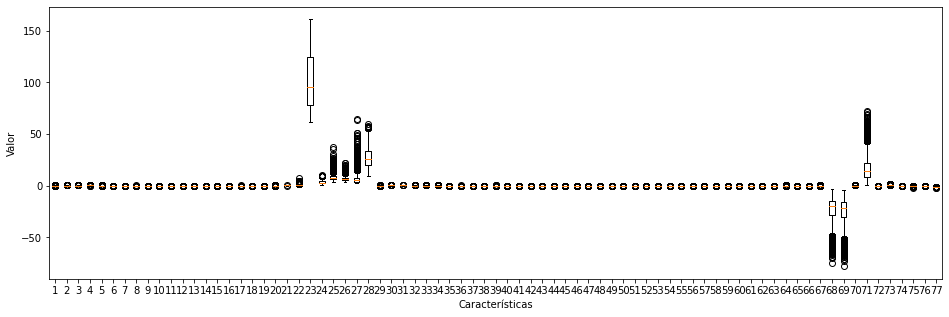

In [38]:
# Grafico las variables para observar su dispersion
plt.figure(figsize=(16, 5))
plt.boxplot(X)
plt.xlabel("Características")
plt.ylabel("Valor")

# Se observan aproximadamente 10 clases con mayor dispersión que el resto

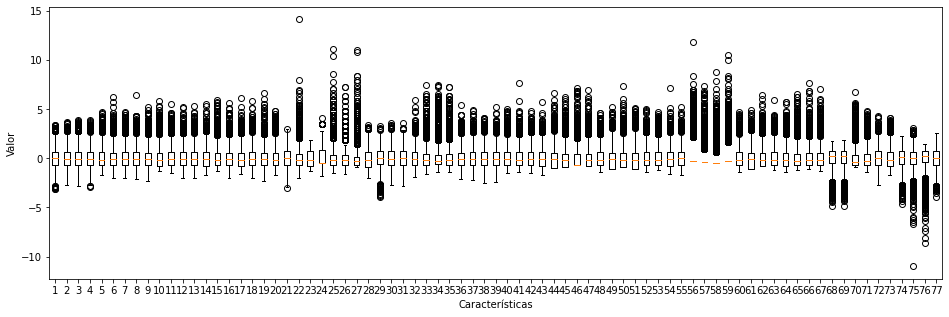

In [39]:
# Normalizo las variables para evitar que las variables con mayor dispersion
# tengan mas efecto en el clasificador
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# de forma similar a un clasificador, el scaler "aprende" a partir de los datos,
# en este caso el valor medio y desvío estándar de cada característica.
scaler.fit(X)
X = scaler.transform(X)

plt.figure(figsize=(16, 5))
plt.boxplot(X);
plt.xlabel("Características")
plt.ylabel("Valor");

# Como resultado todas las caracteristicas normalizadas tienen dispersiones similares

## Entrenamiento y evaluación de los modelos de clasificación ##

In [40]:
# Validación cruzada de 5 particiones
# Para tratar el desbalanceo de clases de los datos realizo 
# una partición estratificada. Cada partición tendrá la misma proporción de clases que los datos originales
from sklearn.model_selection import StratifiedKFold

generador_particiones = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

particiones = list(generador_particiones.split(X, y))


Para evaluar el rendimiento de los modelos a utilizar empleo el *F1 score*.
El *F1 score* es una métrica de evaluación del rendimiento de un modelo de clasificación que combina la precisión (*accuracy*) y la exhaustividad (*recall*) de un modelo en un único valor. Es decir, el F1 score permite evaluar de forma general la precisión y exhaustividad de un modelo.

En el caso de un algoritmo de clasificación como KNN o Random Forest, el F1 score se utiliza para evaluar la precisión del modelo en la tarea de clasificación. Un F1 score alto indica que el modelo tiene un buen rendimiento en la clasificación de las observaciones en las clases correctas, mientras que un F1 score bajo indica que el modelo tiene dificultades para clasificar correctamente las observaciones.

In [41]:
from sklearn.model_selection import train_test_split
# definimos la métrica para evaluar los modelos
from sklearn.metrics import f1_score

# Cargamos los datos de la primer partición de entrenamiento, para separarlos
# en entrenamiento (train) y optimizacion (dev)
train_ind, _ = particiones[0]

Xtrain, Xdev, ytrain, ydev = train_test_split(X[train_ind, :], y[train_ind], test_size=.2, stratify=y[train_ind])

print("Datos de entrenamiento", Xtrain.shape, "| datos de desarrollo:", Xdev.shape)
print(f"Entrenamiento: {len(ytrain)} ({np.sum(ytrain)} positivos)")
print(f"Desarrollo: {len(ydev)} ({np.sum(ydev)} positivos)")

Datos de entrenamiento (3194, 77) | datos de desarrollo: (799, 77)
Entrenamiento: 3194 (196 positivos)
Desarrollo: 799 (49 positivos)


La métrica *accuracy* no funciona bien cuando las clases están desbalanceadas como es en este caso. La mayoría de los *hairpins* no poseen una función conocida, así que es muy fácil para un modelo acertar diciendo que no tendran funcion (clase 0). Para problemas con clases desbalanceadas es mucho mejor usar precision, recall y F1 (que combina precisión y recall). 

In [42]:
# Busqueda de hiperparametros para KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for weight in ["uniform", "distance"]:
        model = KNeighborsClassifier(n_neighbors=k, weights=weight)
        # Entrenamiento
        model.fit(Xtrain, ytrain)
        # Evaluación en entrenamiento
        f1_train = f1_score(ytrain, model.predict(Xtrain))
        # Evaluación en desarrollo
        f1_dev = f1_score(ydev, model.predict(Xdev))
        print(f"k: {k}, weight: {weight}, entrenamiento: {f1_train: .2f}, desarrollo: {f1_dev: .2f}")
    
    # con k = 4 y weight 'distance' se llega a un score de 0.47 en la particion de desarrollo, 
    # al aumentar k ese score no mejora y aumenta el coste computacional.

k: 1, weight: uniform, entrenamiento:  1.00, desarrollo:  0.33
k: 1, weight: distance, entrenamiento:  1.00, desarrollo:  0.33
k: 2, weight: uniform, entrenamiento:  0.51, desarrollo:  0.28
k: 2, weight: distance, entrenamiento:  1.00, desarrollo:  0.33
k: 3, weight: uniform, entrenamiento:  0.61, desarrollo:  0.36
k: 3, weight: distance, entrenamiento:  1.00, desarrollo:  0.36
k: 4, weight: uniform, entrenamiento:  0.46, desarrollo:  0.30
k: 4, weight: distance, entrenamiento:  1.00, desarrollo:  0.38
k: 5, weight: uniform, entrenamiento:  0.54, desarrollo:  0.34
k: 5, weight: distance, entrenamiento:  1.00, desarrollo:  0.34
k: 6, weight: uniform, entrenamiento:  0.37, desarrollo:  0.34
k: 6, weight: distance, entrenamiento:  1.00, desarrollo:  0.34
k: 7, weight: uniform, entrenamiento:  0.46, desarrollo:  0.34
k: 7, weight: distance, entrenamiento:  1.00, desarrollo:  0.34
k: 8, weight: uniform, entrenamiento:  0.38, desarrollo:  0.31
k: 8, weight: distance, entrenamiento:  1.00, de

0.2622950819672131 0.45569620253164556


[0.3050847457627119,
 0.2622950819672131,
 0.45569620253164556,
 0.3548387096774194,
 0.4225352112676057,
 0.3692307692307692,
 0.4117647058823529,
 0.3939393939393939,
 0.43478260869565216]

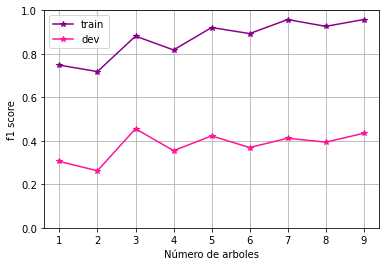

In [43]:
# Busqueda de hiperparametros para RF
f1_train, f1 = [] , []
from sklearn.ensemble import RandomForestClassifier
for k in range(1, 10):
    model = RandomForestClassifier(n_estimators=k, random_state= 74) # uso un random_state para obtener siempre el mismo resultado al volver a ejecutar el notebook
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred = model.predict(Xdev)

    f1_train.append(f1_score(ytrain, pred_train))
    f1.append(f1_score(ydev, pred))

plt.plot(np.arange(1, 10), f1_train, '*-',  label="train", color = 'darkmagenta')
plt.plot(np.arange(1, 10), f1, '*-', label="dev", color = 'deeppink')
plt.ylim([0, 1])
plt.xlabel('Número de arboles')
plt.ylabel('f1 score')
plt.grid()
plt.legend()
print(min(f1), max(f1))
# mayor f1 con 3 arboles
f1

In [45]:
# Validación cruzada
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

results = []

for train_ind, test_ind in particiones:
    for nombre_modelo in ["RF", "KNN"]:
        if nombre_modelo == "RF":
            modelo = RandomForestClassifier(n_estimators= 3, random_state=74)
        if nombre_modelo == "KNN":
            modelo = KNeighborsClassifier(n_neighbors= 4, weights= "distance")
        # notar que ahora X[train_ind, :] contiene a Xtrain y Xdev de la celda
        # anterior
        modelo.fit(X[train_ind, :], y[train_ind])

        pred = modelo.predict(X[test_ind, :])

        results.append([nombre_modelo,
                        accuracy_score(y[test_ind], pred),
                       f1_score(y[test_ind], pred),
                       recall_score(y[test_ind], pred),
                       precision_score(y[test_ind], pred)])

results = pd.DataFrame(results, columns=["modelo", "acc", "f1", "pre", "rec"])
results

,modelo,acc,f1,pre,rec
0,RF,0.939940,0.433962,0.370968,0.522727
1,KNN,0.947948,0.480000,0.387097,0.631579
2,RF,0.943944,0.404255,0.306452,0.593750
3,KNN,0.945946,0.460000,0.370968,0.605263
4,RF,0.943888,0.404255,0.311475,0.575758
5,KNN,0.941884,0.325581,0.229508,0.560000
6,RF,0.943888,0.481481,0.426230,0.553191
7,KNN,0.947896,0.422222,0.311475,0.655172
8,RF,0.944890,0.395604,0.295082,0.600000
9,KNN,0.944890,0.352941,0.245902,0.625000


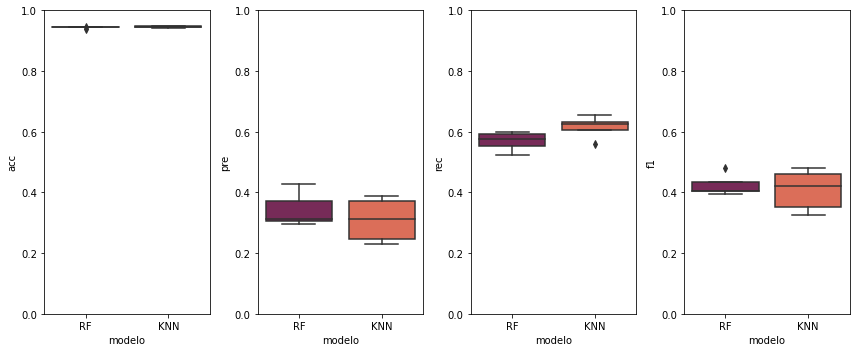

In [46]:
import seaborn as sns

fig, ax = plt.subplots(1, 4, figsize=(12, 5))

for k, metric in enumerate(["acc", "pre", "rec", "f1"]):
    sns.boxplot(data=results, y=metric, x="modelo", ax=ax[k], palette='rocket')
    ax[k].set_ylim([0, 1])
plt.tight_layout()

A partir de los 4 boxplots es posible concluir que:
- Se obtienen valores de f1 similares a los obtenidos durante desarrollo. 
- Los dos modelos poseen valores similares de precisión, recall y f1. 
- En general, la dispersión de estos estimadores es menor para el modelo RF. 
- Sin embargo, la mediana de los estimadores es mayor para el modelo KNN, por lo cual podría considerarse 
que que este modelo tiene una mejor *performance*.

## Limitaciones ##
Es importante destacar que el proyecto tiene algunas limitaciones que podrían afectar los resultados y las conclusiones. Una de ellas es la sobrerrepresentación de la clase 0 en el conjunto de datos utilizado. Esta clase representa secuencias que codifican RNAs capaces de formar estructura de horquilla pero que no tienen una función de miRNA conocida. El desbalance de clases puede afectar la capacidad de los modelos para detectar correctamente pre-miRNAs de la clase 1 (secuencias que codifican pre-miRNAs con función identificada según miRBase).

Otra limitación importante es que dentro de la clase 0 podría haber RNAs que sí funcionan como pre-miRNAs, pero cuya funciones todavía no han sido descubiertas o caracterizadas. Por lo tanto, el uso de esta categoría como negativos verdaderos al entrenar y evaluar los modelos podría afectar la capacidad de los modelos para detectar correctamente pre-miRNAs desconocidos.

A su vez, solo se ajustaron los hiperparámetros **número de árboles** en el modelo de Random Forest y **k y weights** en el modelo de KNN. Es posible que otros hiperparámetros también tengan un impacto en la precisión y rendimiento de los modelos, pero no se exploraron en este proyecto. 

Es importante tener en cuenta estas limitaciones al interpretar los resultados del proyecto y considerar en futuros estudios la necesidad de utilizar conjuntos de datos más equilibrados y la posibilidad de incluir nuevas categorías en la clasificación de pre-miRNAs.

## Conclusión ##
En este proyecto se utilizó aprendizaje automático para la detección de pre-miRNAs en el genoma de *Drosophila melanogaster*. Se compararon dos modelos, KNN y Random Forest, en términos de su desempeño en la clasificación de secuencias como pre-miRNAs con función o secuencias que no son pre-miRNAs.

Los resultados mostraron que los dos modelos se desempeñaron de forma similar, con valores similares de precisión, *recall* y F1. Sin embargo, la mediana de los estimadores fue levemente mayor para el modelo KNN, lo que sugiere que este modelo puede ser ligeramente superior en términos de su desempeño general. Además, se observó que el modelo de Random Forest presentó una menor dispersión en los valores estimados de precisión, *recall* y F1.

En general, los resultados obtenidos indican que el uso de técnicas de aprendizaje automático para la detección de pre-miRNAs puede ser una estrategia efectiva. 